<a id="top"></a>
# Optimization with CVXPY

1. [Exercise](#Exercise)  
2. [Resourcing Problem](#ResourcingProblem)  
3. [Sausages Problem](#SausagesProblem)
4. [Foreman: Orange Juice](#OrangeJuice)

#### Case Studies for Exercise Book
1. [Ethiopian Chemical Company](#ChemicalCompany)
2. [Short-term Financing](#termFinancing)

#### Excercise Generator
1. [Simple Exercise](#generator1)
--------------------

### Excercise
Source: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linprog.html

Miminize
$f(\mathbf{x}) = -1x_0 + 4x_1$

subject to:<br>
$-3x_0 + 1x_1 \le 6$<br>
$+1x_0 + 2x_1 \le 4$<br>
$x_0 \ge 0$<br>
$x_1 \ge -3$

In [ ]:
import cvxpy as cp
import numpy as np

# variables
x = cp.Variable(2) # vector x with 2 elements

# objective function
objective = cp.Maximize(1*x[0] - 4*x[1])

# constraints
constraints = [-3*x[0] + x[1] <= 6,
               x[0] + 2*x[1] <= 4,
               x[0] >= 0,
               x[1] >= -3]

# formulate problem and solve
problem = cp.Problem(objective, constraints)
problem.solve()

# print result
print('\nOptimum',round(res),'at',x.value)

**Primal problem**:

Max $f(x) = 10 \cdot x_0 + 22 \cdot x_1$ &nbsp; (Maximize profit)
	
subject to:

$1 \cdot x_0 + 3 \cdot x_1 \le 8$ &nbsp; (total machine hours)<br>
$2 \cdot x_0 + 4 \cdot x_1 \le 9$ &nbsp; (total labour hours)<p>
$x_0, x_1 \ge 0$	&nbsp;  (units of final products)

In [ ]:
import cvxpy as cp, numpy as np

# variables
x = cp.Variable(2, nonneg=True)

# objective
objective = cp.Maximize(10*x[0]+22*x[1])  # maximize total profit from sales

# constraints
constraints = [1*x[0] + 3*x[1] <= 8,  # machine hours
               2*x[0] + 4*x[1] <= 9]  # labour hours

# set up problem and solve
problem = cp.Problem(objective, constraints)
problem.solve()

# print results
print('Maxium profit: ',problem.value)
print()
print('Units of Product 0:', np.round(x[0].value,2))
print('Units of Product 1:', np.round(x[1].value,2))
print()
print('Shadow price machine:', np.round(constraints[0].dual_value,2))
print('Shadow price labour:', np.round(constraints[1].dual_value,2))

now formulated with matrices:

--------------------------------------------

Max $f(x) = 10 \cdot x_0 + 22 \cdot x_1$ &nbsp; (Maximize profit)
	
s.t.:

$1 \cdot x_0 + 3 \cdot x_1 \le 8$ &nbsp; (total machine hours)<br>
$2 \cdot x_0 + 4 \cdot x_1 \le 9$ &nbsp; (total labour hours)<p>
$x_0, x_1 \ge 0$	&nbsp;  (units of final products)

In [ ]:
import cvxpy as cp, numpy as np

# variables
x = cp.Variable(2, nonneg=True, name='x')  # the name parameter is not mandatory, but helpful

# objective
c = np.array([10, 22])               # profits per unit of final product
objective = cp.Maximize(c@x)         # maximize total profit from sales

# constraints
A = np.array([[1, 3],  # machine hours
              [2, 4]]) # labour hours
b = np.array([8,
              9])
constraints = [A@x <= b]

# set up problem and solve
problem = cp.Problem(objective, constraints)
problem.solve()

# collect results
f_opt = problem.value
x_opt = x.value
shadow_prices = problem.constraints[0].dual_value

# print results
print('The following problem was solved:')
print(problem)
print()
print('Problem Status after Solving:',problem.status)
print()
print('Maxium profit: ',f_opt)
print()
print('Units of Product 0:', round(x_opt[0],2))
print('Units of Product 1:', round(x_opt[1],2))
print()
print("Shadow price:")
print('for Product 0: ', shadow_prices[0])
print('for Product 1: ', shadow_prices[1])

In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial linear program.
m = 15
n = 10
np.random.seed(1)
s0 = np.random.randn(m)
lamb0 = np.maximum(-s0, 0)
s0 = np.maximum(s0, 0)
x0 = np.random.randn(n)
A = np.random.randn(m, n)
b = A@x0 + s0
c = -A.T@lamb0

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A@x <= b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)

<a id="ResourcingProblem"></a>
## Resourcing Problem

from http://benalexkeen.com/linear-programming-with-python-and-pulp-part-3/

We’re consulting for a boutique car manufacturer, producing luxury cars.

They run on one month (30 days) cycles, we have one cycle to show we can provide value.

There is one robot, 2 engineers and one detailer in the factory. The detailer has some holiday off, so only has 21 days available.

The 2 cars need different time with each resource:

Robot time: Car A – 3 days; Car B – 4 days.

Engineer time: Car A – 5 days; Car B – 6 days.

Detailer time: Car A – 1.5 days; Car B – 3 days.

Car A provides €30,000 profit, whilst Car B offers €45,000 profit.

At the moment, they produce 4 of each cars per month, for €300,000 profit. Not bad at all, but we think we can do better for them.

**Structuring the Problem**

Time for production in days (d):

|             | Car 0 (A) | Car 1 (B) | Available | Comment
|-----------------------------|-----------|------------------------ |
|Robot (1)    | 3     | 4     | 30        | as many as day in month |
|Engineer (2) | 5     | 6     | 60        | 2 x 30 (2 engineers)    |
|Detailer (1) | 1.5   | 3     | 21        | some days of            |

**Formal Setup**

$x$ : days

Max profit (EUR) $f(x) = 30x_0 + 45x_1$

subject to:

$  3.0 x_0 + 4x_1 \le 30$<br>
$  5.0 x_0 + 6x_1 \le 60$<br>
$1.5x_0 + 3x_1 \le 21$<br>
$x_0, x_1 \ge 0$

In [ ]:
import cvxpy as cp
import numpy as np

# variables
x = cp.Variable(2, nonneg=True, name='x')

# objective
objective = cp.Maximize(30*x[0]+45*x[1])

# constraints
constraints = [3.0*x[0]+4.0*x[1] <= 30,
               5.0*x[0]+6.0*x[1] <= 60,
               1.5*x[0]+3.0*x[1] <= 21]

# problem
problem = cp.Problem(objective, constraints)
problem.solve()

# output
print('Status', problem.status)
print('Profit', problem.value)
print('Cars produced:')
print('Car A', x[0].value)
print('car B', x[1].value)

Setup that makes the solver run without errors:

In [ ]:
import cvxpy as cp
import numpy as np

# variables
x = cp.Variable(2, nonneg=True, name='x')

# objective
objective = cp.Maximize(30*x[0]+45*x[1])

# constraints
constraints = [3.0*x[0]+4.0*x[1] <= 30,
               5.0*x[0]+6.0*x[1] <= 60,
               1.501*x[0]+3.0*x[1] <= 21]

# problem
problem = cp.Problem(objective, constraints)
problem.solve()

# output
print('Status', problem.status)
print('Profit', problem.value)
print('Cars produced:')
print('Car A', round(x[0].value))
print('car B', round(x[1].value))

------------------------
with matrices:

Maximize profit $\quad f(x) = \mathbf{c^Tx}$

subject to:

$\mathbf{Ax \le b}$<br>
$\mathbf{x} \ge 0$

In [ ]:
import cvxpy as cp
import numpy as np

# variables
x = cp.Variable(2, nonneg=True, name='x')

# objective
p = np.array([30,
              45])
objective = cp.Maximize(p.T@x)

# constraints
A = np.array([[3, 4],
             [5, 6],
             [1.501, 3]])
b = np.array([30,
              60,
              21])
constraints = [A@x <= b]

# problem
problem = cp.Problem(objective, constraints)
problem.solve()

# output
print('Status', problem.status)
print('Profit', problem.value)
print('Cars produced:')
print('Car A', round(x[0].value))
print('Car B', round(x[1].value))

<a id="SausagesProblem"></a>
## Sausages Problem

from http://benalexkeen.com/linear-programming-with-python-and-pulp-part-4/

We’re going to make some sausages!

We’ll make 2 types of sausage:
- Economy (>40% Pork)
- Premium (>60% Pork)  

One sausage is 50 grams (0.05 kg)

We have the following ingredients available to us:

| Ingredient	| Cost (€/kg) |	Availability (kg) |
|-------------------------------------------------|
|Pork	    | 4.32	      | 30 |
|Wheat	    | 2.46	      | 20 |
|Starch	    | 1.86	      | 17 |

According to government regulations, the most starch we can use in our sausages is 25%

We have a contract with a butcher, and have already purchased 23 kg pork, that must go in our sausages.

We have a demand for 350 economy sausages and 500 premium sausages.

We need to figure out how to most cost effectively blend our sausages.

**Formal Setup**

$\mathbf{c}$ = vector of costs<br>
$\mathbf{b}$ = vector of available kg<br>
$\mathbf{x}$ = vector of ingredient weights in kg

using the symbols $p$ for *pork*, $w$ for *wheat* and $s$ for *starch*<br>
using $weight$ as symbol for the weight of sausages<br>
using *pr* and *ec* as symbols for *premium* and *economy*

All calculations are done in kg.

$weight_{pr} = 350 \cdot 0.05$<br>
$weight_{ec} = 500 \cdot 0.05$

&nbsp;

Min $f(x) = \mathbf{c \cdot x}$ &nbsp; (minimize costs)

subject to:

$ x_s \le (weight_{ec}+weight_{pr}) \cdot 0.25 \quad$ (max 25% starch of total weight)

$ x_p > kg_{ec} \cdot 0.40 + kg_{pr} \cdot 0.60\quad$
(min of pork)
      
$ x_p > 23 \quad$ (pork from butcher has to be used)

$\mathbf{x} \le \mathbf{b} \quad$ (use only available ingredients)

&nbsp;

**Technical Note**
CVXPY officially doesn't support Pandas. So, you can't

- use Pandas series or dataframes in the objective function
- use Pandas in the variable definition

But you can
- use Pandas in the constraints

In [71]:
import cvxpy as cp
import numpy as np
import pandas as pd

# preliminary definitions and calculations
ingredients = ['pork','wheat','starch']
weight = pd.Series([350*0.05,500*0.05], index=['ec','pr'])

c = np.array([4.32, 2.46, 1.86]) # costs
print(c)
# b = np.array([30, 20, 17]) # availabe ingredients
b = pd.Series([30, 20, 17], index=ingredients)
pork=0; wheat=1; starch=2;
ec = 0; pr = 1

# variables
x = cp.Variable((3,2), nonneg=True, name='x') # kg per ingredient

# objective
objective = cp.Minimize(sum(c@x)) # cost per ingredient x kg used

# constraints
constraints = [sum(x[:,ec]) == weight['ec'],
               sum(x[:,pr]) == weight['pr'],
               x[starch,ec] <= 0.25*(weight['ec']), # max starch
               x[starch,pr] <= 0.25*(weight['pr']), # max starch
               sum(x[pork]) >= 23,          # pork from butcher,
               x[pork,ec] >= 0.4*weight['ec'],  # min pork
               x[pork,pr] >= 0.6*weight['pr'],   # min pork
               x[:,ec]+x[:,pr] <= b # only what is available
              ]

# set up problem and solve
problem = cp.Problem(objective, constraints)
print(problem) # check
problem.solve()

# output
print(problem.status)
print('Production of economy', weight['ec'],'kg')
print('Production of premium', weight['pr'],'kg')
print('Minimum of costs:',problem.value)
print('Pork',x.value[pork],'in %:',np.round(x.value[pork]/weight.sum,2))
print('Wheat',x.value[wheat])
print('Starch',x.value[starch],'in %:',np.round(x.value[starch]/kg,2))

[4.32 2.46 1.86]
minimize 0.0 + [4.32 2.46 1.86] * x[0] + [4.32 2.46 1.86] * x[1]
subject to 0.0 + x[0:3, 0][0] + x[0:3, 0][1] + x[0:3, 0][2] == 17.5
           0.0 + x[0:3, 1][0] + x[0:3, 1][1] + x[0:3, 1][2] == 25.0
           x[2, 0] <= 4.375
           x[2, 1] <= 6.25
           23.0 <= 0.0 + x[0, 0:2][0] + x[0, 0:2][1]
           7.0 <= x[0, 0]
           15.0 <= x[0, 1]
           x[0:3, 0] + x[0:3, 1] <= [30. 20. 17.]
optimal
Production of economy 17.5 kg
Production of premium 25.0 kg
Minimum of costs: 140.95554473982176


TypeError: unsupported operand type(s) for /: 'float' and 'method'

In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd

# preliminary definitions and calculations
pork=0; wheat=1; starch=2;

weight_ec = 350*0.05
weight_pr = 500*0.05

c = np.array([4.32, 2.46, 1.86]) # costs
b = np.array([30, 20, 17]) # availabe ingredients

# variables
x = cp.Variable((3,2), nonneg=True, name='x') # kg per ingredient

# objective
objective = cp.Minimize(sum(c@x)) # cost per ingredient x kg used

# constraints
constraints = [sum(x[:,ec]) == weight_ec,
               sum(x[:,pr]) == weight_pr,
               x[starch,ec] <= 0.25*(weight_ec), # max starch
               x[starch,pr] <= 0.25*(weight_pr), # max starch
               sum(x[pork]) >= 23,          # pork from butcher,
               x[pork,ec] >= 0.4*weight_ec,  # min pork
               x[pork,pr] >= 0.6*weight_pr,   # min pork
               x[:,ec]+x[:,pr] <= b # only what is available
              ]

# set up problem and solve
problem = cp.Problem(objective, constraints)
print(problem) # check
problem.solve()

# output
print(problem.status)
print('Production of economy',kg[ec],'kg')
print('Production of premium',kg[pr],'kg')
print('Minimum of costs:',problem.value)
print('Pork',x.value[pork],'in %:',np.round(x.value[pork]/kg,2))
print('Wheat',x.value[wheat])
print('Starch',x.value[starch],'in %:',np.round(x.value[starch]/kg,2))

<a id="OrangeJuice"></a>
## Foreman: Orange Juice

$ \frac{b\cdot x_m}{\sum x_m} \qquad$ (Brix-to-Acid)  

In [45]:
import pandas as pd
import numpy as np
import cvxpy as cp

# print with thousands separator
np.set_printoptions(formatter={'int_kind': '{:,}'.format})

path='C:/Users/Wingenroth/Dropbox/Bücher/Smart Data/kap04/'
file='OrangensaftMischen.xlsx'
sheet='Spezifikationen'
specs = pd.read_excel(path+file,sheet)

# names (for nicer output)
countries = specs['Herkunft']
months = ['Jan','Feb','Mar']

# costs
c = specs['Preis (pro 1K Gallonen)']+specs['Transport-kosten']
c = np.asarray(c) # convert to numpy array, otherwise cvxpy objective will not work
n = len(c) # length

# variable names
jan=0; feb=1; mar=2;
florida=2
brixToAcid = np.asarray(specs['Verhältnis Brix / Säure'])
acid = np.asarray(specs['Säure (%)'])
color = np.asarray(specs['Farbe (1-10 Scale)'])
adstringent = np.asarray(specs['Adstringens (1-10 Skala)'])
#print('Adstringent',adstringent)

# variables
x = cp.Variable((n,3), nonneg=True, name='x')

# objective
objective = cp.Minimize(sum(c@x))

# constraints
volume = [600000, 600000, 700000]
constraints = [sum(x[:,jan]) >= volume[jan],              # volume January
               sum(x[:,feb]) >= volume[feb],              # volume February
               sum(x[:,mar]) >= volume[mar],              # volume March
               x[florida,jan] >= 0.4*volume[jan],       # Florida share January
               x[florida,feb] >= 0.4*volume[feb],       # Florida share February
               x[florida,mar] >= 0.4*volume[mar], 
               (brixToAcid@x[:,jan])/volume[jan] <= 12.5,
               (brixToAcid@x[:,jan])/volume[jan] >= 11.5,
               (brixToAcid@x[:,feb])/volume[feb] <= 12.5,
               (brixToAcid@x[:,feb])/volume[feb] >= 11.5,
               (brixToAcid@x[:,mar])/volume[mar] <= 12.5,
               (brixToAcid@x[:,mar])/volume[mar] >= 11.5,
               (acid@x[:,jan])/volume[jan] <= 0.01,
               (acid@x[:,jan])/volume[jan] >= 0.0075,
               (acid@x[:,feb])/volume[feb] <= 0.01,
               (acid@x[:,feb])/volume[feb] >= 0.0075,
               (acid@x[:,mar])/volume[mar] <= 0.01,
               (acid@x[:,mar])/volume[mar] >= 0.0075,
               (color@x[:,jan])/volume[jan] >= 4.5,
               (color@x[:,jan])/volume[jan] <= 5.5,
               (color@x[:,feb])/volume[feb] >= 4.5,
               (color@x[:,feb])/volume[feb] <= 5.5,
               (color@x[:,mar])/volume[mar] >= 4.5,
               (color@x[:,mar])/volume[mar] <= 5.5,
               (adstringent@x[:,jan])/volume[jan] <= 4,
               (adstringent@x[:,feb])/volume[feb] <= 4,
               (adstringent@x[:,mar])/volume[mar] <= 4,
              ]

# -------------
#    Output
# -------------

# specifications
#print(specs)

# problem
problem = cp.Problem(objective, constraints)
#print(problem)
print()
problem.solve(verbose=False, solver='ECOS')
print(problem.status)

min_costs = problem.value/1000
print('Costs (USD):',format(round(min_costs,2),','))
print('\nVolumes:')
volumes = pd.DataFrame(x.value, index=countries, columns=months).round()
print(volumes)

print('\nMonthly Volumes ordered:')
print(volumes.sum(axis=0))
print()

print('Check constraints:')
v = np.asarray(x.value)
print('Brix/Acid:',np.round(brixToAcid@v/v.sum(axis=0),4), '(range allowed 11.5-12.5)')
print('Acid level:',np.round(acid@v/v.sum(axis=0),6), '(range allowed 0.0075-0.01)')
print('Color level:',np.round(color@v/v.sum(axis=0),1), '(range allowed 4.5-5.5)')
print('Adstringent level:',np.round(adstringent@v/v.sum(axis=0),2), '(max <4)')
for c in problem.constraints:
    print(np.round(c.violation(),4))


optimal
Costs (USD): 1,176,575.0

Volumes:
                  Jan       Feb       Mar
Herkunft                                 
Brasilien         0.0       0.0       0.0
Indien            0.0       0.0       0.0
Florida      240000.0  240000.0  280000.0
Kalifornien       0.0       0.0       0.0
Arizona           0.0       0.0       0.0
Texas             0.0       0.0       0.0
China             0.0       0.0       0.0
Spanien           0.0       0.0       0.0
Mexiko       120000.0  120000.0  140000.0
Ägypten      135000.0  135000.0  157500.0
Italien      105000.0  105000.0  122500.0

Monthly Volumes ordered:
Jan    600000.0
Feb    600000.0
Mar    700000.0
dtype: float64

Check constraints:
Brix/Acid: [11.775 11.775 11.775] (range allowed 11.5-12.5)
Acid level: [0.0102 0.0102 0.0102] (range allowed 0.0075-0.01)
Color level: [4.5 4.5 4.5] (range allowed 4.5-5.5)
Adstringent level: [4. 4. 4.] (max <4)
0.0001
0.0001
0.0001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0002
0.0
0.0002
0.0
0.0002
0.

In [6]:
print(cp.installed_solvers())

['ECOS', 'ECOS_BB', 'OSQP', 'SCS']


In [46]:
import pandas as pd
import numpy as np
import cvxpy as cp

path='C:/Users/Wingenroth/Dropbox/Bücher/Smart Data/kap04/'
file='OrangensaftMischen.xlsx'
sheet='Spezifikationen'
specs = pd.read_excel(path+file,sheet)
# print(specs)

# names (for nicer output)
countries = specs['Herkunft']
monthsNames = ['Jan','Feb','Mar']

# costs
c = specs['Preis (pro 1K Gallonen)']+specs['Transport-kosten']
c = np.asarray(c) # convert to numpy array, otherwise cvxpy objective will not work
n = len(c) # length

# variable names
jan=0; feb=1; mar=2;
months=[jan,feb,mar]
florida=2
brixToAcid = np.asarray(specs['Verhältnis Brix / Säure'])
acid = np.asarray(specs['Säure (%)'])

# variables
x = cp.Variable((n,3), nonneg=True, name='x')

# objective
objective = cp.Minimize(sum(c@x))

# constraints
volume = [600000, 600000, 700000]
constraints = []
for month in months:          
    constraints += [sum(x[:,month]) == volume[month]] 
    constraints += [x[florida,month] >= 0.4*volume[month]]         
    constraints += [x[florida,month] >= 0.4*sum(x[:,month])]
    constraints += [(brixToAcid@x[:,month])/volume[month] <= 12.5]
    constraints += [(brixToAcid@x[:,month])/volume[month] >= 11.5]
    constraints += [(acid@x[:,month])/volume[month] <= 0.01]
    constraints += [(acid@x[:,month])/volume[month] >= 0.0075]
# !!!!!!!!!!!!!! Use need to put square brackets around the constraint to make it run!


# problem
problem = cp.Problem(objective, constraints)
#print(problem)
print()
problem.solve(solver='ECOS')
print('Costs:',problem.value/1000)
print('\nVolumes:')
volumes = pd.DataFrame(x.value, index=countries, columns=monthsNames)
print()
print(np.round(volumes))

SyntaxError: invalid syntax (<ipython-input-46-3398f64bea9b>, line 37)

<a id="ChemicalCompany"></a>
    
## Ethiopian Chemical Company

$x_1 =$ tons of aluminium sulphate  
$x_2 =$ tons of sulphuric acid

Max $f(x) = 3760.66x_0 + 4604.58x_1$

subject to:

$0.45x_0 + 2.15x_1 \le 24 \qquad$ (reaction)  
$0.20x_0 + 2.15x_1 \le 24 \qquad$ (filtration)  
$0.10x_0 + 2.15x_1 \le 24 \qquad$ (evaporation)  

$x_0 \le 20 \qquad$ (demand for aluminum suphate)  
$x_1 \le 51.5 \qquad$ (demand for suphuric acid)

In [17]:
import cvxpy as cp
import numpy as np

x = cp.Variable(2, name='x')

objective = cp.Maximize(3760.66*x[0]+4604.58*x[1])

constraints = [0.45*x[0] + 2.15*x[1] <= 24,
               0.20*x[0] + 2.15*x[1] <= 24,
               0.10*x[0] + 2.15*x[1] <= 24,
              x[0] <= 20,
              x[1] <=51.5]

problem = cp.Problem(objective, constraints)
problem.solve(solver='ECOS')

print(problem)
print(problem.status)
print('Objective at optimum: ', format(round(problem.value),','))
print('Variables at optimum:', np.round(x.value,2))
print()
print('Sensitivity Report:')
print('reaction', round(constraints[0].dual_value))
print('filtration',round(constraints[1].dual_value))
print('evaporation',round(constraints[2].dual_value))

maximize 3760.66 * x[0] + 4604.58 * x[1]
subject to 0.45 * x[0] + 2.15 * x[1] <= 24.0
           0.2 * x[0] + 2.15 * x[1] <= 24.0
           0.1 * x[0] + 2.15 * x[1] <= 24.0
           x[0] <= 20.0
           x[1] <= 51.5
optimal
Objective at optimum:  107,338.0
Variables at optimum: [20.    6.98]

Sensitivity Report:
reaction 2142
filtration 0
evaporation 0


[back to top](#top)

<a id="termFinancing"></a>
## Short-term Financing
(F2K3A3 - S18)

taken from Cornuejols/Tütüncü: *Optimization Methods in Finance*, Cambridge, p.41ff

A company has the following short-term financing problem:

|               | Jan  | Feb  | Mar  | Apr  | May  | Jun  |
|---------------|------|------|------|------|------|------|
| Net cash flow | -150 | -100 | +200 | -200 |  +50 | 300  |

Net cash flow requirements are given n thousands of dollars. The company has the following sources of funds:
- a line of credit of up to USD100k at an interest rate of 1% per month;
- in any one of the first three months, it can issue 90-day commercial paper bearing a total interest of 2% for the three-month period, payable after 90 days
- excess funds can be invested at an interest rate of 0.3% per month

**Solution**

*Decision Variables*  
$\mathbf{x} =$ use of credit line (in thousends of USD), 6 elements, one for each month  
$\mathbf{y} =$ CP volume (in thousands of USD), 3 elements, one for each month  
$\mathbf{z} =$ excess funds volume, 6 elements, one for each month

*Objective*
Max $f(x) = z_5$

*Constraints*    
Jan: $-150 + x_0 + y_0 - z_0 = 0$  
Feb: $1.01x_0 + 1.003z_0 -100 + x_1 + y_1 - z_1 = 0$  
Mar: $1.01x_1 + 1.003z_1 + 200 + x_2 + y_2 - z_2 = 0$  
Apr: $1.01x_2 + 1.003z_2 -1.02y_0 - 200 + x_3 - z_3 = 0$  
May: $1.01x_3 + 1.003z_3 -1.02y_1 + 50 + x_4 - z_4 = 0$  
June: $1.01x_4 + 1.003z_4 -1.02y_2 + 300 + x_5 - z_5 = 0$  
$\mathbf{x} <= 100$  
$\mathbf{x},\mathbf{y},\mathbf{z} >= 0$  

In [16]:
import cvxpy as cp
import numpy as np

x = cp.Variable(6, nonneg=True, name='x')
y = cp.Variable(3, nonneg=True, name='y')
z = cp.Variable(6, nonneg=True, name='z')

objective = cp.Maximize(z[5])

constraints = [                                   -150 +x[0] +y[0] -z[0] == 0,
              -1.01*x[0] + 1.003*z[0]             -100 +x[1] +y[1] -z[1] == 0,
              -1.01*x[1] + 1.003*z[1]             +200 +x[2] +y[2] -z[2] == 0,
              -1.01*x[2] + 1.003*z[2] - 1.02*y[0] -200 +x[3]       -z[3] == 0,
              -1.01*x[3] + 1.003*z[3] - 1.02*y[1]  +50 +x[4]       -z[4] == 0,
              -1.01*x[4] + 1.003*z[4] - 1.02*y[2] +300             -z[5] == 0,
               x <= 100
              ]

problem = cp.Problem(objective, constraints)
problem.solve(solver='ECOS')

print(problem)
print()
print(problem.status)
print()
print('Objective:',round(problem.value,2))
print('Credit Line x',np.round(x.value))
print('CP Volume y', np.round(y.value,2))
print('Account z',np.round(z.value,2))
print('\nConstraint violations:')
for c in problem.constraints:
    print(np.round(c.violation(),4))

maximize z[5]
subject to -150.0 + x[0] + y[0] + -z[0] == 0.0
           -1.01 * x[0] + 1.003 * z[0] + -100.0 + x[1] + y[1] + -z[1] == 0.0
           -1.01 * x[1] + 1.003 * z[1] + 200.0 + x[2] + y[2] + -z[2] == 0.0
           -1.01 * x[2] + 1.003 * z[2] + -1.02 * y[0] + -200.0 + x[3] + -z[3] == 0.0
           -1.01 * x[3] + 1.003 * z[3] + -1.02 * y[1] + 50.0 + x[4] + -z[4] == 0.0
           -1.01 * x[4] + 1.003 * z[4] + -1.02 * y[2] + 300.0 + -z[5] == 0.0
           x <= 100.0

optimal

Objective: 92.5
Credit Line x [ 0. 26.  0.  0. 26. 50.]
CP Volume y [150.    74.42 177.78]
Account z [  0.     0.   351.94   0.     0.    92.5 ]

Constraint violations:
0.0
0.0
0.0
0.0
0.0
0.0
[0. 0. 0. 0. 0. 0.]


[back to top](#top)

<a id="generator1"></a>
## Exercise Generator

Assume a firm that makes sleeping bags $x_1$ and tents $x_2$. Each sleeping bag requires 2 hours for cutting A, 5 hours for sewing B, and 1 hour for waterproofing C. Each tent requires 1 hour for cutting, 5 hours for sewing, and 3 hours for waterproofing. Given current resources, the company has at most 14 hours for cutting, 40 hours for sewing, and 18 hours for waterproofing a day. Its profit margin is \$50 per sleeping bag and \$30 per tent.

Taken from: Dowling, Edward T.. Schaum's Outline of Mathematical Methods for Business and Economics. Chapter 7. McGraw-Hill Education. Kindle-Version. 

Maximize total profit!

In doing so, follow the following steps:
\begin{enumerate}
\item Set up the problem in standard form.
\item Draw a picture of the problem and shade the feasible region.
\item Find the optimal solution graphically.
\item Set up the problem in CVXPY in standard form and solve it. Was your graphical solution right?
\item Set up the problem again in CVXPY, this time in matrix

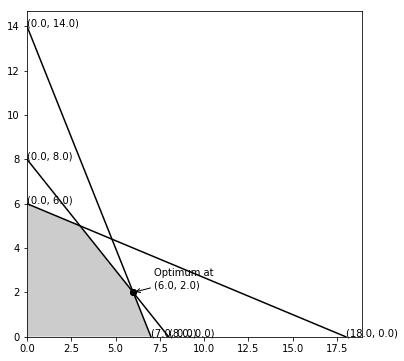

\newpage

\underline{Code for CVXPY in Standard Form}

\protect{\begin{lstlisting}
import cvxpy as cp
import numpy as np

# variables
x = cp.Variable(2, nonneg=True)

# objective
objective = cp.Maximize(50*x[0]+30*x[1])

# constraints
constraints = [
2*x[0]+1*x[1] <= 14,
5*x[0]+5*x[1] <= 40,
1*x[0]+3*x[1] <= 18,
]

# set up and solve problem
problem = cp.Problem(objective, constraints)
problem.solve(solver='ECOS')

# output
print('Optimum',round(problem.value,2),'at',np.round(x.value,2))

# shadow prices
lambdas = problem.constraints[0].dual_value
print('Shadow Prices: ',np.round(lambdas,2))
\end{lstlisting}}
CVXPY gives the following solution:

Optimum 360.0 at [6. 2.]

Shadow Prices:
 [20.  2.  0.]
\spa
\newpage

\underline{Code for CVXPY in Matrix Form}

\protect{\begin{lstlisting}
import cvxpy as cp
import numpy as np

# problem parameters
c = np.array([ 50 , 30 ])

A = np.array([
[2,1],
[5,5],
[1,3]])

b = np.array([ 14 , 40 , 18 ])

# variables
x = cp.Variable(2, nonneg=True)

# 

In [16]:
import numpy as np
from numpy.linalg import solve
import xlsxwriter as xls
from xlsxwriter.utility import xl_rowcol_to_cell
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

# ===================================
# parameters that define the exercise
# ===================================
name = 'BagsAndTents'
path = 'C:/Users/Wingenroth/Dropbox/Vorlesungen/Mathematik/img/'
excel_path = 'C:/Users/Wingenroth/Dropbox/Vorlesungen/Mathematik/2019/International/Excel-Übungen/'

story = "Assume a firm that makes sleeping bags $x_1$ and tents $x_2$. Each sleeping bag requires 2 hours for cutting A, 5 hours for sewing B, and 1 hour for waterproofing C. Each tent requires 1 hour for cutting, 5 hours for sewing, and 3 hours for waterproofing. Given current resources, the company has at most 14 hours for cutting, 40 hours for sewing, and 18 hours for waterproofing a day. Its profit margin is \\$50 per sleeping bag and \\$30 per tent."
source ="Dowling, Edward T.. Schaum's Outline of Mathematical Methods for Business and Economics. Chapter 7. McGraw-Hill Education. Kindle-Version. "

typ = 'profit'  # profit, costs
unit = 'EUR'
unit_x = 'pieces'
unit_constr = 'hours'
table_placement = 'solution' # task, solution

c = np.array([50, 30])

A = np.array([[2, 1],
              [5, 5],
              [1, 3]])
b = np.array([14,
              40,
              18])

colHeader = ['Sleeping Bags','Tents']
rowHeader = ['Cutting','Sewing','Waterproofing']
# =====================================

# define in addition for later use in the graph
def f(x): 
    return c@x

file_name = 'exercise'+name

def constraints_table():
    # table with constraints
    print()
    print('\\begin{tabular}{r|',end='')
    for _ in range(n):
        print('r',end='')
    print('|r}')
    print(' & ', end='')
    for h in colHeader:
        print(h,' & ', end='')
    print(' available \\\\ \hline')
    for i in range(m):
        print(rowHeader[i],' & ', end='')
        for j in range(n):
            print(A[i,j],'& ',end='')
        print(b[i],'\\\\')
    print('\end{tabular}')
    print('\\spa')
    print()

# ------------ printing for Latex -------------------------
m, n = np.shape(A)
products = n
machines = m

#print('The company ', company, ' produces ', products ,' products. There are several process steps involved on ', machines, '.')
#print('Every product needs different times on the different machines. Due to daily maintenance, the machines are only available for production for a couple of hours.')
print(story)
print()
print('Taken from: '+source)

if table_placement=='task': constraints_table()

print()
if typ == 'costs':
    print('Minimize total production costs!')
else:
    print('Maximize total profit!')
print()
print('In doing so, follow the following steps:')
print('\\begin{enumerate}')
print('\\item Set up the problem in standard form.')
print('\\item Draw a picture of the problem and shade the feasible region.')
print('\\item Find the optimal solution graphically.')
print('\\item Set up the problem in CVXPY in standard form and solve it. Was your graphical solution right?')
print('\\item Set up the problem again in CVXPY, this time in matrix form, and solve it. Are your solutions identical?')
print('\\item Now formulate the problem in Excel and solve it using Solver. Is the solution identical to CVXPY?')
print('\\end{enumerate}')
print()

print()

print('%=== Lösungen ===')
print('\\ifnum\\value{lstSolution}=1{')
print()

# ----------- Standard Form -------------------

print('\\spa')
print()
print('{\\it Solutions:}')
print()
print('\\underline{Standard Form}')
print()

if table_placement=='solution':
    print('Constraints of the Problem:')
    constraints_table()

if typ=='profit':
    print('Max $f(x)=',end='')
else:
    print('Min $f(x)=',end='')
for i in range(n-1):
    print(c[i],'x_',i,'+',sep='',end='')
print(c[n-1],'x_',n-1,'$',sep='')
print()
print('subject to\\\\[5pt]')
for i in range(m):
    print('$\\quad ',end='')
    for j in range(n-1):
        print(A[i,j],'x_',j,'+',sep='',end='')
    print(A[i,n-1],'x_',n-1,sep='',end='')
    print(' \\le ' if typ=='profit' else ' \\ge ',end='')
    print(b[i],'$\\\\',sep='')
print('$',end='')
for j in range(n-1):
    print('x_',j,',',sep='',end='')
print('x_',n-1,' \ge 0$', sep='')

print('\\newpage')

# ----------- task code (with matrices) -------------------

import cvxpy as cp
import numpy as np

# variables: vector x with 2 elements, bounded to be both >0
x = cp.Variable(2, nonneg=True)

# objective function
objective = cp.Maximize(c@x)

# constraints
constraints = [A*x <= b]

# formulate problem and solve
problem = cp.Problem(objective, constraints)
problem.solve(solver='ECOS')

# print result
#print('\nOptimum',round(problem.value,2),'at',np.round(x.value,2))

# shadow prices
lambdas = problem.constraints[0].dual_value
#print('\nShadow Prices:\n',np.round(lambdas,2))
print('\\spa')

# --- picture ------------------------------------------------------

print()
print('\\underline{Picture and Graphical Solution}')
print()

print('Take each one of the constraints and change the inequality sign into an equality sign.')
print('Then set each variable to 0 in turn and solve the resulting equation for the other one.\\\\')
print('Example for the first constraint:')
print()
# just constraint
for i in range(1):
    print('$',end='')
    for j in range(n-1):
        print(A[i,j],'x_',j,'+',sep='',end='')
    print(A[i,n-1],'x_',n-1,sep='',end='')
    print(' \\le ' if typ=='profit' else ' \\ge ',end='')
    print(b[i],'$',sep='')
print()
# sign to equal
for i in range(1):
    print('$',end='')
    for j in range(n-1):
        print(A[i,j],'x_',j,'+',sep='',end='')
    print(A[i,n-1],'x_',n-1,sep='',end='')
    print(' = ',end='')
    print(b[i],'$',sep='')
print()
print('$'+str(A[0,0])+'\cdot 0 + '+str(A[0,1])+' \cdot x_1 = '+str(b[0])+' \\quad \\Leftrightarrow \quad ',end='')
print('x_1 = '+str(b[0])+' : '+str(A[0,1])+'\\quad \\Leftrightarrow \quad ', end='')
res1 = str(round(b[0]/A[0,1],2))
print('x_1 = '+res1+'$')
print()
print('This gives the first point (0, '+res1+') at the intersection with the $x_0$-axis.')
print('In an analogous fashion, you can solve for $x_1$ and thus find a second point for this constraint, this time the intersection with the y-axis:\\\\[5pt]')
print('$'+str(A[0,0])+'\cdot x_0 + '+str(A[0,1])+' \cdot 0 = '+str(b[0])+' \\quad \\Leftrightarrow \quad ',end='')
print('x_0 = '+str(b[0])+' : '+str(A[0,0])+'\\quad \\Leftrightarrow \quad ', end='')
res0 = str(round(b[0]/A[0,0],2))
print('x_0 = '+res0+'$')
print()
print('Thus, you have two points on the first constraint, (0, '+res1+') and ('+res0+', 0) to draw the line.')
print('The pairs of points for all the constraints:')
print()
print('\\begin{tabular}{p{5cm}l}')

# ---- graph --

m, n = np.shape(A)

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

# vertex is the list of points of which the polygon will later be drawn
vertex = np.zeros([1,2])

# lines of constraints
for i in range(m):
    B = A[i,:]
    a = np.zeros([2,2]) # collects the two intersections between axis and line
    for j in range(n):
        xc = np.zeros(n)
        xc[j] = b[i]/B[j]
        a[j] = xc
        o = f(xc)
        # add to vertex for polygon if binding, i.e. objective < optimum
        if o<=problem.value+0.01:
            vertex = np.append(vertex,[xc],axis=0)
    plt.plot(a[0],a[1],'k-') # plot constraint
    # name the intersections with the axis in the graph
    plt.text(a[0,0],a[0,1]*1.12,'('+str(a[0,0])+', '+str(a[0,1])+')') # intersection with x-axis
    plt.text(a[1,0]*1.12,a[1,1],'('+str(a[1,0])+', '+str(a[1,1])+')') # intersection with y-axis
    # print for solution text
    print('('+str(a[1,0])+', '+str(a[1,1])+'), ',end='') # intersection with y-axis  
    print('('+str(a[0,0])+', '+str(a[0,1])+') &', end='') # intersection with x-axis
    print('('+rowHeader[i]+') \\\\')
  
    
# optimum
opt_x = x.value[0]
opt_y = x.value[1]
plt.plot([opt_x,opt_x],[opt_y,opt_y],'ko')
opt_text = 'Optimum at\n('+str(np.round(opt_x,1))+', '+str(np.round(opt_y,1))+')'
plt.annotate(opt_text, xy=(opt_x,opt_y), xytext=(opt_x*1.2,opt_y*1.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'),) 
    
# intersections of constraints
s = np.zeros(2)
B = np.zeros([2,2])
for i in range(m):
    for j in range(i+1,m):
        B[0,:] = A[i,:]
        B[1,:] = A[j,:]
        s[0] = b[i]
        s[1] = b[j]
        y = solve(B,s)
        o = f(y)
        if o<=problem.value+0.01:
            # add only to vertex if it is a binding constraint, i.e. its objective value < optimum
            vertex = np.append(vertex,[y],axis=0)

# sort so that the correct order is given in which the corners are connected
vertex = vertex[vertex[:,1].argsort()] # sort by 2nd colum

# draw polygon
poly = Polygon(vertex,closed=True,edgecolor='0.9',facecolor='0.8',fill=True)
ax.add_patch(poly)
# plt.plot([0,0],[1,1]) # otherwise polygon is not shown

plt.title=name
plt.xlim(left=0)
plt.ylim(bottom=0)


print('\\end{tabular}')
print()
print('\\includegraphics[scale=0.6]{\img/'+file_name+'}')
print()
plt.savefig(path+file_name)
plt.show()

print('\\newpage')

# --- CVXPY in Standard Form ----

print()
print('\\underline{Code for CVXPY in Standard Form}')
print()

print('\\protect{\\begin{lstlisting}')
print('import cvxpy as cp')
print('import numpy as np')
print()

# problem setup
print('# variables')
print('x = cp.Variable(',n,', nonneg=True)',sep='')
print()
print('# objective')
if typ=='profit':
    print('objective = cp.Maximize(',end='')
    for i in range(n):
        print(c[i],'*x[',i,']',sep='',end='')
        if i<(n-1): print('+',end='')
    print(')')
elif typ=='costs':
    print('objective = cp.Minimize(c@x)')
print()
print('# constraints')
if typ=='profit':
    sign = ' <= '
elif typ=='costs':
    sign = ' >= '
print('constraints = [')
for i in range(m):
    for j in range(n):
        print(str(A[i,j])+'*x['+str(j)+']', end='')
        if j<(n-1): print('+',end='')
    print(sign, end='')
    print(b[i],end='')
    print(',')
print(']')
print()
print('# set up and solve problem')
print('problem = cp.Problem(objective, constraints)')
print("problem.solve(solver='ECOS')")
print()
# output
print('# output')
print("print('Optimum',round(problem.value,2),'at',np.round(x.value,2))")
print()
print('# shadow prices')
print('lambdas = problem.constraints[0].dual_value')
print("print('Shadow Prices: ',np.round(lambdas,2))")

print('\\end{lstlisting}}')

print('CVXPY gives the following solution:')
print('\nOptimum',round(problem.value,2),'at',np.round(x.value,2))

# shadow prices
print('\nShadow Prices:\n',np.round(lambdas,2))
print('\\spa')

print('\\newpage')

# --- CVXPY in Matrix Form ----

print()
print('\\underline{Code for CVXPY in Matrix Form}')
print()

print('\\protect{\\begin{lstlisting}')
print('import cvxpy as cp')
print('import numpy as np')
print()
# problem parameters
print('# problem parameters')
print("c = np.array([ ",end='')
for j in range(n-1):
    print(c[j],", ",end='')
print(c[n-1],"])")
print()

print("A = np.array([")
for i in range(m):
    print("[",end='')
    for j in range(n-1):
        print(A[i,j],",",sep='',end='')
    print(A[i,n-1],"]",sep='',end='')
    if i<(m-1): print(',')
print("])")
print()

print("b = np.array([ ",end='')
for i in range(m-1):
    print(b[i],", ",end='')
print(b[m-1],"])")
print()

# problem setup
print('# variables')
print('x = cp.Variable(',n,', nonneg=True)',sep='')
print()
print('# objective')
if typ=='profit':
    print('objective = cp.Maximize(c@x)')
elif typ=='costs':
    print('objective = cp.Minimize(c@x)')
print()
print('# constraints')
if typ=='profit':
    print('constraints = [A@x <= b]')
elif typ=='costs':
    print('constraints = [A@x >= b]')
print()
print('# set up and solve problem')
print('problem = cp.Problem(objective, constraints)')
print("problem.solve(solver='ECOS')")
print()
# output
print('# output')
print("print('Optimum',round(problem.value,2),'at',np.round(x.value,2))")
print()
print('# shadow prices')
print('lambdas = problem.constraints[0].dual_value')
print("print('Shadow Prices: ',np.round(lambdas,2))")
print('\\end{lstlisting}}')
print()

print('\\newpage')

print('\\fi')
print('}')

# print('=== Solution ===')

#print("Optimium: ",problem.value)
#print("x-Werte: ", np.round(x.value,3))
#print("f(x)",f(x.value))

# ------------------- Excel ----------------
# Generate Workbook
# prepare ExcelWriter for output
wb = xls.Workbook(excel_path+name+'.xlsx')
ws = wb.add_worksheet()

# formats
bold = wb.add_format({'bold': True})
italic = wb.add_format({'italic': True})
border = wb.add_format({'border': True})
border.set_bold()
border.set_align('center')
border.set_num_format('#,##0.00')
right_border = wb.add_format({'right': True})
right_border_bold = wb.add_format()
right_border_bold.set_right(2)
headline = wb.add_format({'bottom': True, 'right': True})
headline.set_align('center')
headline_bold = wb.add_format({'bottom': True, 'right': 2})
headline_bold.set_align('center')
blue = wb.add_format()
blue.set_bg_color('ddebf7')
blue.set_right()
blue.set_align('center')
eur_format = wb.add_format()
eur_format.set_num_format('#,##0.00 €')
eur_format.set_right()
eur_format.set_align('center')

# top of sheet
ws.write(0,0,'Exercise: '+name, bold)
ws.write(2,0,'Objective',italic)
z=3
if typ=='profit':
    ws.write(z,0,'Maximize total '+typ)
elif typ=='costs':
    ws.write(z,0,'Minimize total '+typ)
#ws.write(z,2,0,border)
wb.define_name('total_'+typ,'=Sheet1!$C$4')
ws.write('D4',unit)
formula = ''
for j in range(n):
    formula += '+'+typ+'_'+str(j)+'*x_'+str(j)
ws.write_formula('C4',formula, border)

# table with decision variables
z=5
ws.write(z,0,'',headline)
for j in range(n):
    ws.write(z,j+1,colHeader[j],headline)
z+=1
if typ=='profit':
    ws.write(z,0,'Net '+typ, right_border)
elif typ=='costs':
    ws.write(z,0,'Costs', right_border)
for j in range(n):
    # costs / profit per product
    ws.write(z,j+1,c[j], eur_format)
    ws.write(z+1,j+1,0, eur_format)
z+=1
ws.write(z,0,unit_x+' x', right_border)
ws.write(z,1,0,blue)
for j in range(n):
    # cell names
    addr_str = '=Sheet1!$'+chr(66+j)+'$'+str(z)  # costs / profit per product
    wb.define_name(typ+'_'+str(j),addr_str)
    addr_str = '=Sheet1!$'+chr(66+j)+'$8' # decision var
    wb.define_name('x_'+str(j),addr_str)
addr_str = '=Sheet1!$'+chr(65+j)+'$8:$'+chr(65+n)+'$8' # decision var
wb.define_name(unit_x+'_x',addr_str)    
ws.write(z,2,o,blue)
z=7+m
ws.write(z,0,'Unequality Constraints', italic)
z+=1
# set column widths
max_width = max(rowHeader[h] for h in range(m))
ws.set_column('A:A',len(max_width)+1)
max_width = max(len(colHeader[h]) for h in range(n))
ws.set_column(1,n,max_width+1)

# table of inequality constraints
ws.write(z,0,'',headline)
for j in range(n):
    ws.write(z,j+1,colHeader[j], headline if j<n-1 else headline_bold)
# Used
ws.write(z,j+n,'Used',headline)
addr_str = '=Sheet1!$'+chr(66+n)+'$'+str(z+2)+':$'+chr(66+n)+'$'+str(z+1+m)
wb.define_name(unit_constr+'_used',addr_str)
ws.write(z,j+1+n,'Allowed',headline_bold)
addr_str = '=Sheet1!$'+chr(66+1+n)+'$'+str(z+2)+':$'+chr(66+1+n)+'$'+str(z+1+m)
wb.define_name(unit_constr+'_allowed',addr_str)
z += 1
for i in range(m):
    ws.write(z,0,rowHeader[i],right_border)
    for j in range(n):
        ws.write(z,j+1,A[i,j],right_border if j<n-1 else right_border_bold)
    formula = ''
    for j in range(n):
        formula += '+'+xl_rowcol_to_cell(z,j+1)+'*x_'+str(j)
    ws.write_formula(z,n+1,formula,right_border)
    ws.write(z,n+2,b[i],right_border_bold)
    z += 1
z+=1
ws.write(z,0,'Non-Negativity Constraints', italic)
z+=1
ws.write(z,0,'x_1, x_2 > 0')
ws.hide_gridlines(2)
wb.close()

In [9]:
print(chr(64+1))

A



Optimum 190.0 at [57.5 50. ]

Shadow Prices:
 [0.   0.17 0.33]
C:/Users/Wingenroth/Dropbox/Vorlesungen/Mathematik/img/exercise_1


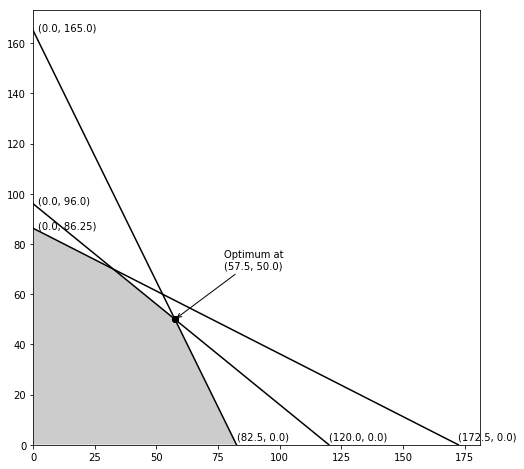

In [206]:
# ----------- task code (with matrices) -------------------

import cvxpy as cp
import numpy as np

# variables: vector x with 2 elements, bounded to be both >0
x = cp.Variable(2, nonneg=True)

# objective function
objective = cp.Maximize(c@x)

# constraints
constraints = [A*x <= b]

# formulate problem and solve
problem = cp.Problem(objective, constraints)
problem.solve(solver='ECOS')

# print result
print('\nOptimum',round(problem.value,2),'at',np.round(x.value,2))

# shadow prices
lambdas = prob.constraints[0].dual_value
print('\nShadow Prices:\n',np.round(lambdas,2))

# -------------------- graph -------------------------------

m, n = np.shape(A)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()

# vertex is the list of points of which the polygon will later be drawn
vertex = np.zeros([1,2])

# lines of constraints
for i in range(m):
    B = A[i,:]
    a = np.zeros([2,2]) # collects the two intersections between axis and line
    for j in range(n):
        xc = np.zeros(n)
        xc[j] = b[i]/B[j]
        a[j] = xc
        o = f(xc)
        # add to vertex for polygon if binding, i.e. objective < optimum
        if o<=problem.value+0.01:
            vertex = np.append(vertex,[xc],axis=0)
    plt.plot(a[0],a[1],'k-') # plot constraint
    plt.text(a[0,0],a[0,1]+2,'('+str(a[0,0])+', '+str(a[0,1])+')') # intersection with x-axis
    plt.text(a[1,0]+2,a[1,1],'('+str(a[1,0])+', '+str(a[1,1])+')') # intersection with y-axis
    
# optimum
opt_x = x.value[0]
opt_y = x.value[1]
plt.plot([opt_x,opt_x],[opt_y,opt_y],'ko')
opt_text = 'Optimum at\n('+str(np.round(opt_x,1))+', '+str(np.round(opt_y,1))+')'
plt.annotate(opt_text, xy=(opt_x,opt_y), xytext=(opt_x+20,opt_y+20),
             arrowprops=dict(facecolor='black', arrowstyle='->'),) 
    
# intersections of constraints
s = np.zeros(2)
B = np.zeros([2,2])
for i in range(m):
    for j in range(i+1,m):
        B[0,:] = A[i,:]
        B[1,:] = A[j,:]
        s[0] = b[i]
        s[1] = b[j]
        y = solve(B,s)
        o = f(y)
        if o<=problem.value+0.01:
            # add only to vertex if it is a binding constraint, i.e. its objective value < optimum
            vertex = np.append(vertex,[y],axis=0)

# sort so that the correct order is given in which the corners are connected
vertex = vertex[vertex[:,1].argsort()] # sort by 2nd colum

# draw polygon
poly = Polygon(vertex,closed=True,edgecolor='0.9',facecolor='0.8',fill=True)
ax.add_patch(poly)
# plt.plot([0,0],[1,1]) # otherwise polygon is not shown

plt.xlim(left=0)
plt.ylim(bottom=0)

print(path+file_name)
plt.savefig(path+file_name)
plt.show()

[back to top](#top)